In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('youtube_comments.csv')

In [ ]:
df

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1032220,UgzbdYHBNUK8vdnF4Gp4AaABAg,7eh4d6sabA0,Python Machine Learning Tutorial (Data Science),@lelandconn,UC9Ytc56P0SxTKmhNthhP8zw,Any recommendations for how to build on top of...,Positive,4,0,2021-05-21 18:50:02,AU,27
1032221,UgwLe7Xcul9CzKBVLk54AaABAg_aug,J7JKVEvX2JA,Lady Almost Runs Over Motorcycle Driver,AugmentedUser,AugmentedCID,"Act foolishly, receive foolish rewards.",Negative,0,0,2025-02-04 14:27:27,US,2
1032222,UgzBhmg37U-Oaz8FWdB4AaABAg,sqkwHUyV-YY,Behind the Scenes of The Coding Train: How I L...,@vincentbergeron518,UC3LbLVC3uW9lrHn32B0O6Rg,I think many people would like to know the mod...,Neutral,0,0,2019-08-06 03:06:07,US,27
1032223,UgyvPRGCCJdF2MFNa794AaABAg,dbF2kijWNyc,5 PC Tips for Beginners,@katastrophe5039,UCCuvY33Wlcg7zZGdieXLvUA,Caramel,Neutral,0,0,2025-01-10 09:43:40,AU,28


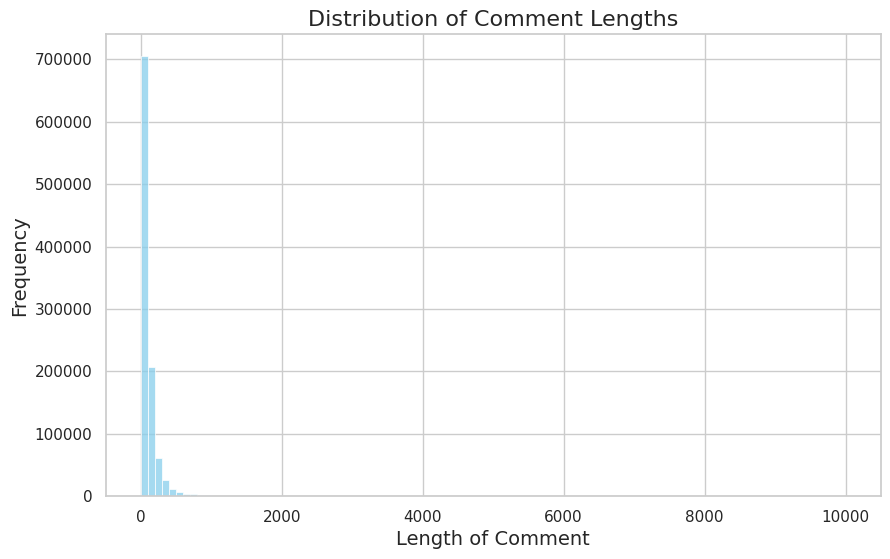

In [ ]:
df['CommentLength'] = df['CommentText'].str.len()

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['CommentLength'], kde=False, bins=100, color='skyblue')

# Add labels and title
plt.title('Distribution of Comment Lengths', fontsize=16)
plt.xlabel('Length of Comment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [ ]:
df[(df['CommentLength'] >= 0) & (df['CommentLength'] <= 500)].shape[0]

1010133

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
def tokenize_comment(comment):
    return tokenizer.tokenize(comment)

In [ ]:
df['Tokens'] = df['CommentText'].apply(tokenize_comment)

In [ ]:
df['Tokens']

,Tokens
0,"[▁Any, one, ▁know, ▁what, ▁movie, ▁this, ▁is, ?]"
1,"[▁The, ▁fact, ▁they, ', re, ▁holding, ▁each, ▁..."
2,"[▁waiting, ▁next, ▁video, ▁will, ▁be, ?]"
3,"[▁Thanks, ▁for, ▁the, ▁great, ▁video, ., ▁I, ▁..."
4,"[▁Good, ▁person, ▁helping, ▁good, ▁people, ., ..."
...,...
1032220,"[▁Any, ▁recommendations, ▁for, ▁how, ▁to, ▁bui..."
1032221,"[▁Act, ▁fool, ish, ly, ,, ▁receive, ▁fool, ish..."
1032222,"[▁I, ▁think, ▁many, ▁people, ▁would, ▁like, ▁t..."
1032223,"[▁Cara, mel]"


In [ ]:
df['CountTokens'] = df['Tokens'].apply(len)

In [ ]:
df['CountTokens']

,CountTokens
0,8
1,19
2,6
3,115
4,21
...,...
1032220,30
1032221,11
1032222,16
1032223,2


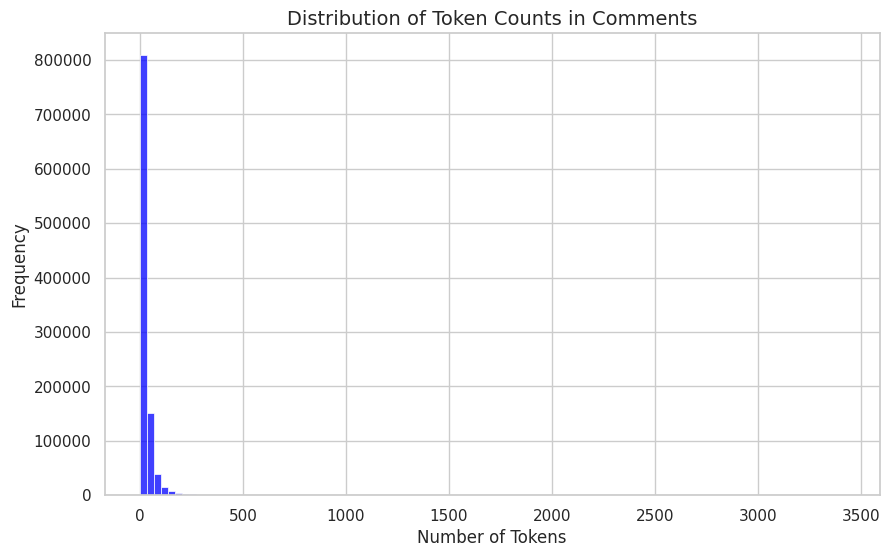

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CountTokens'], kde=False, bins=100, color='blue')

# Adding titles and labels
plt.title('Distribution of Token Counts in Comments', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
df[(df['CountTokens'] >= 0) & (df['CountTokens'] <= 64)].shape[0]

952351

In [ ]:
len(df['CommentText'].unique())

989881

In [ ]:
df_cleaned = df.drop_duplicates(subset='CommentText', keep='first')

In [ ]:
df_cleaned['Tokens']

,Tokens
0,"[▁Any, one, ▁know, ▁what, ▁movie, ▁this, ▁is, ?]"
1,"[▁The, ▁fact, ▁they, ', re, ▁holding, ▁each, ▁..."
2,"[▁waiting, ▁next, ▁video, ▁will, ▁be, ?]"
3,"[▁Thanks, ▁for, ▁the, ▁great, ▁video, ., ▁I, ▁..."
4,"[▁Good, ▁person, ▁helping, ▁good, ▁people, ., ..."
...,...
1032219,"[▁me, ▁here, ▁just, ▁to, ▁read, ▁people, s, ▁c..."
1032220,"[▁Any, ▁recommendations, ▁for, ▁how, ▁to, ▁bui..."
1032221,"[▁Act, ▁fool, ish, ly, ,, ▁receive, ▁fool, ish..."
1032222,"[▁I, ▁think, ▁many, ▁people, ▁would, ▁like, ▁t..."


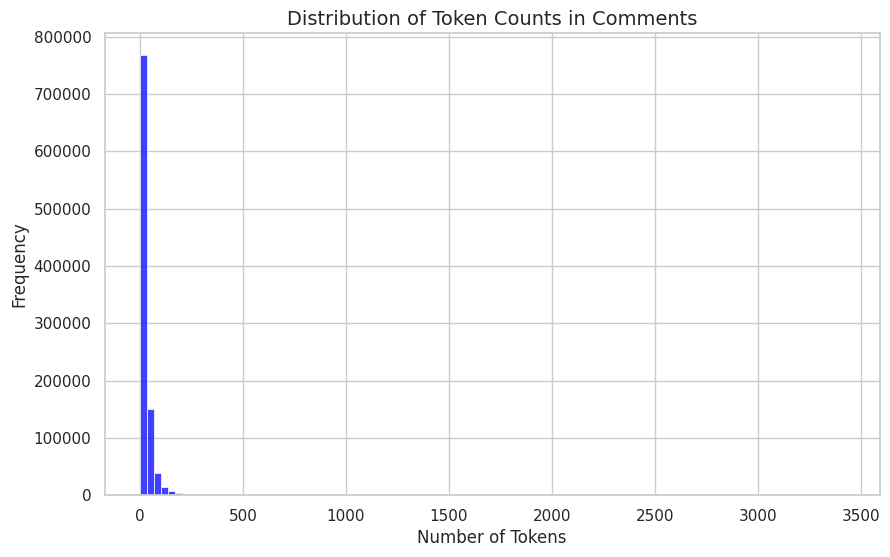

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CountTokens'], kde=False, bins=100, color='blue')

# Adding titles and labels
plt.title('Distribution of Token Counts in Comments', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
df_cleaned.columns

Index(['CommentID', 'VideoID', 'VideoTitle', 'AuthorName', 'AuthorChannelID',
       'CommentText', 'Sentiment', 'Likes', 'Replies', 'PublishedAt',
       'CountryCode', 'CategoryID', 'CommentLength', 'Tokens', 'CountTokens'],
      dtype='object')

In [ ]:
df_main = df_cleaned[['CommentText', 'Sentiment']]
df_main

,CommentText,Sentiment
0,Anyone know what movie this is?,Neutral
1,The fact they're holding each other back while...,Positive
2,waiting next video will be?,Neutral
3,Thanks for the great video.\n\nI don't underst...,Neutral
4,Good person helping good people.\nThis is how ...,Positive
...,...,...
1032219,me here just to read peoples comments about th...,Neutral
1032220,Any recommendations for how to build on top of...,Positive
1032221,"Act foolishly, receive foolish rewards.",Negative
1032222,I think many people would like to know the mod...,Neutral


In [ ]:
df_main.to_csv('df_preprocessed.csv', index=False)

In [ ]:
df_cleaned.to_csv('df_unique.csv', index=False)

In [ ]:
df_new = pd.read_csv('/content/df_unique.csv')
df_new

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,CommentLength,Tokens,CountTokens
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,488,"['▁Thanks', '▁for', '▁the', '▁great', '▁video'...",115
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989876,UgzGkyDtKRBpexV5Jad4AaABAg,1KrI0PMLAv8,Supreme Court upholds TikTok ban,@liamseven1604,UC_OcGj7o6zhHbrphPAQANdQ,me here just to read peoples comments about th...,Neutral,6,0,2025-01-19 07:35:39,US,25,86,"['▁me', '▁here', '▁just', '▁to', '▁read', '▁pe...",19
989877,UgzbdYHBNUK8vdnF4Gp4AaABAg,7eh4d6sabA0,Python Machine Learning Tutorial (Data Science),@lelandconn,UC9Ytc56P0SxTKmhNthhP8zw,Any recommendations for how to build on top of...,Positive,4,0,2021-05-21 18:50:02,AU,27,128,"['▁Any', '▁recommendations', '▁for', '▁how', '...",30
989878,UgwLe7Xcul9CzKBVLk54AaABAg_aug,J7JKVEvX2JA,Lady Almost Runs Over Motorcycle Driver,AugmentedUser,AugmentedCID,"Act foolishly, receive foolish rewards.",Negative,0,0,2025-02-04 14:27:27,US,2,39,"['▁Act', '▁fool', 'ish', 'ly', ',', '▁receive'...",11
989879,UgzBhmg37U-Oaz8FWdB4AaABAg,sqkwHUyV-YY,Behind the Scenes of The Coding Train: How I L...,@vincentbergeron518,UC3LbLVC3uW9lrHn32B0O6Rg,I think many people would like to know the mod...,Neutral,0,0,2019-08-06 03:06:07,US,27,78,"['▁I', '▁think', '▁many', '▁people', '▁would',...",16


In [ ]:
df_64 = df_new[df_new['CountTokens'] <= 64]
df_64

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,CommentLength,Tokens,CountTokens
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21
5,UgzoTpY5F11FtcooFRR4AaABAg,NnJ4XJdZW4I,The lawyer brilliantly got it out of the way #...,@TrymAndresBernes,UCX_OJCxRZDFELHrLemK4ONw,Dei løk de seim😂,Neutral,0,0,2025-01-14 20:23:42,NZ,1,16,"['▁Dei', '▁', 'løk', '▁de', '▁se', 'im', '😂']",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989876,UgzGkyDtKRBpexV5Jad4AaABAg,1KrI0PMLAv8,Supreme Court upholds TikTok ban,@liamseven1604,UC_OcGj7o6zhHbrphPAQANdQ,me here just to read peoples comments about th...,Neutral,6,0,2025-01-19 07:35:39,US,25,86,"['▁me', '▁here', '▁just', '▁to', '▁read', '▁pe...",19
989877,UgzbdYHBNUK8vdnF4Gp4AaABAg,7eh4d6sabA0,Python Machine Learning Tutorial (Data Science),@lelandconn,UC9Ytc56P0SxTKmhNthhP8zw,Any recommendations for how to build on top of...,Positive,4,0,2021-05-21 18:50:02,AU,27,128,"['▁Any', '▁recommendations', '▁for', '▁how', '...",30
989878,UgwLe7Xcul9CzKBVLk54AaABAg_aug,J7JKVEvX2JA,Lady Almost Runs Over Motorcycle Driver,AugmentedUser,AugmentedCID,"Act foolishly, receive foolish rewards.",Negative,0,0,2025-02-04 14:27:27,US,2,39,"['▁Act', '▁fool', 'ish', 'ly', ',', '▁receive'...",11
989879,UgzBhmg37U-Oaz8FWdB4AaABAg,sqkwHUyV-YY,Behind the Scenes of The Coding Train: How I L...,@vincentbergeron518,UC3LbLVC3uW9lrHn32B0O6Rg,I think many people would like to know the mod...,Neutral,0,0,2019-08-06 03:06:07,US,27,78,"['▁I', '▁think', '▁many', '▁people', '▁would',...",16


In [ ]:
df_64 = df_64[['CommentText', 'Sentiment']]

In [ ]:
df_64.to_csv('comments_64.csv', index=False)

In [ ]:
df_imp = df_new[['CommentText', 'Sentiment', 'CommentLength', 'Tokens', 'CountTokens']]
df_imp

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
0,Anyone know what movie this is?,Neutral,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,The fact they're holding each other back while...,Positive,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,waiting next video will be?,Neutral,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
3,Thanks for the great video.\n\nI don't underst...,Neutral,488,"['▁Thanks', '▁for', '▁the', '▁great', '▁video'...",115
4,Good person helping good people.\nThis is how ...,Positive,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21
...,...,...,...,...,...
989876,me here just to read peoples comments about th...,Neutral,86,"['▁me', '▁here', '▁just', '▁to', '▁read', '▁pe...",19
989877,Any recommendations for how to build on top of...,Positive,128,"['▁Any', '▁recommendations', '▁for', '▁how', '...",30
989878,"Act foolishly, receive foolish rewards.",Negative,39,"['▁Act', '▁fool', 'ish', 'ly', ',', '▁receive'...",11
989879,I think many people would like to know the mod...,Neutral,78,"['▁I', '▁think', '▁many', '▁people', '▁would',...",16


In [ ]:
df_imp.to_csv('comment_imp.csv', index=False)

In [ ]:
df = pd.read_csv('comment_imp.csv')
df.head()

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
0,Anyone know what movie this is?,Neutral,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,The fact they're holding each other back while...,Positive,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,waiting next video will be?,Neutral,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
3,Thanks for the great video.\n\nI don't underst...,Neutral,488,"['▁Thanks', '▁for', '▁the', '▁great', '▁video'...",115
4,Good person helping good people.\nThis is how ...,Positive,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21


In [ ]:
len(df)

989881

In [ ]:
def replace_links(df):
    pattern = r'\b(?:https?|ftp|file|mailto):\/\/\S+|(?:www\.)\S+\.\S+\b'
    return df['CommentText'].str.replace(pattern, '', regex=True)

In [ ]:
df['CommentText'] = replace_links(df)

In [ ]:
df_cleaned = df[df['CommentText'] != '']

In [ ]:
df_cleaned

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
0,Anyone know what movie this is?,Neutral,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,The fact they're holding each other back while...,Positive,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,waiting next video will be?,Neutral,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
3,Thanks for the great video.\n\nI don't underst...,Neutral,488,"['▁Thanks', '▁for', '▁the', '▁great', '▁video'...",115
4,Good person helping good people.\nThis is how ...,Positive,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21
...,...,...,...,...,...
989876,me here just to read peoples comments about th...,Neutral,86,"['▁me', '▁here', '▁just', '▁to', '▁read', '▁pe...",19
989877,Any recommendations for how to build on top of...,Positive,128,"['▁Any', '▁recommendations', '▁for', '▁how', '...",30
989878,"Act foolishly, receive foolish rewards.",Negative,39,"['▁Act', '▁fool', 'ish', 'ly', ',', '▁receive'...",11
989879,I think many people would like to know the mod...,Neutral,78,"['▁I', '▁think', '▁many', '▁people', '▁would',...",16


In [ ]:
from transformers import AutoTokenizer

model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
def tokenize_comment(comment):
    return tokenizer.tokenize(comment)

In [ ]:
df_cleaned = df_cleaned.drop(columns=['CommentLength', 'Tokens', 'CountTokens'])

In [ ]:
df_cleaned['CommentLength'] = df_cleaned['CommentText'].str.len()

In [ ]:
df_cleaned['Tokens'] = df_cleaned['CommentText'].apply(tokenize_comment)

In [ ]:
df_cleaned['CountTokens'] = df_cleaned['Tokens'].apply(len)

In [ ]:
df_cleaned.shape

(989532, 5)

In [ ]:
df_cleaned.dtypes

,0
CommentText,object
Sentiment,object
CommentLength,int64
Tokens,object
CountTokens,int64


In [ ]:
df_cleaned.to_csv('com_rel.csv', index=False)

In [ ]:
df_demo = pd.read_csv('com_rel.csv')

In [ ]:
df_demo

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
0,Anyone know what movie this is?,Neutral,31,"['▁Any', 'one', '▁know', '▁what', '▁movie', '▁...",8
1,The fact they're holding each other back while...,Positive,79,"['▁The', '▁fact', '▁they', ""'"", 're', '▁holdin...",19
2,waiting next video will be?,Neutral,27,"['▁waiting', '▁next', '▁video', '▁will', '▁be'...",6
3,Thanks for the great video.\n\nI don't underst...,Neutral,488,"['▁Thanks', '▁for', '▁the', '▁great', '▁video'...",115
4,Good person helping good people.\nThis is how ...,Positive,94,"['▁Good', '▁person', '▁helping', '▁good', '▁pe...",21
...,...,...,...,...,...
989527,me here just to read peoples comments about th...,Neutral,86,"['▁me', '▁here', '▁just', '▁to', '▁read', '▁pe...",19
989528,Any recommendations for how to build on top of...,Positive,128,"['▁Any', '▁recommendations', '▁for', '▁how', '...",30
989529,"Act foolishly, receive foolish rewards.",Negative,39,"['▁Act', '▁fool', 'ish', 'ly', ',', '▁receive'...",11
989530,I think many people would like to know the mod...,Neutral,78,"['▁I', '▁think', '▁many', '▁people', '▁would',...",16


In [ ]:
com_64 = df_cleaned[df_cleaned['CountTokens'] <= 64]
com_64

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
0,Anyone know what movie this is?,Neutral,31,"[▁Any, one, ▁know, ▁what, ▁movie, ▁this, ▁is, ?]",8
1,The fact they're holding each other back while...,Positive,79,"[▁The, ▁fact, ▁they, ', re, ▁holding, ▁each, ▁...",19
2,waiting next video will be?,Neutral,27,"[▁waiting, ▁next, ▁video, ▁will, ▁be, ?]",6
4,Good person helping good people.\nThis is how ...,Positive,94,"[▁Good, ▁person, ▁helping, ▁good, ▁people, ., ...",21
5,Dei løk de seim😂,Neutral,16,"[▁Dei, ▁, løk, ▁de, ▁se, im, 😂]",7
...,...,...,...,...,...
989876,me here just to read peoples comments about th...,Neutral,86,"[▁me, ▁here, ▁just, ▁to, ▁read, ▁people, s, ▁c...",19
989877,Any recommendations for how to build on top of...,Positive,128,"[▁Any, ▁recommendations, ▁for, ▁how, ▁to, ▁bui...",30
989878,"Act foolishly, receive foolish rewards.",Negative,39,"[▁Act, ▁fool, ish, ly, ,, ▁receive, ▁fool, ish...",11
989879,I think many people would like to know the mod...,Neutral,78,"[▁I, ▁think, ▁many, ▁people, ▁would, ▁like, ▁t...",16


In [ ]:
com64 = com_64.drop(columns=['CommentLength', 'Tokens', 'CountTokens'])
com64

,CommentText,Sentiment
0,Anyone know what movie this is?,Neutral
1,The fact they're holding each other back while...,Positive
2,waiting next video will be?,Neutral
4,Good person helping good people.\nThis is how ...,Positive
5,Dei løk de seim😂,Neutral
...,...,...
989876,me here just to read peoples comments about th...,Neutral
989877,Any recommendations for how to build on top of...,Positive
989878,"Act foolishly, receive foolish rewards.",Negative
989879,I think many people would like to know the mod...,Neutral


In [ ]:
com64.dtypes

,0
CommentText,object
Sentiment,object


In [ ]:
com64.to_csv('com64.csv', index=False)

In [ ]:
df = pd.read_csv('com_rel.csv')

In [ ]:
df.shape

(989532, 5)

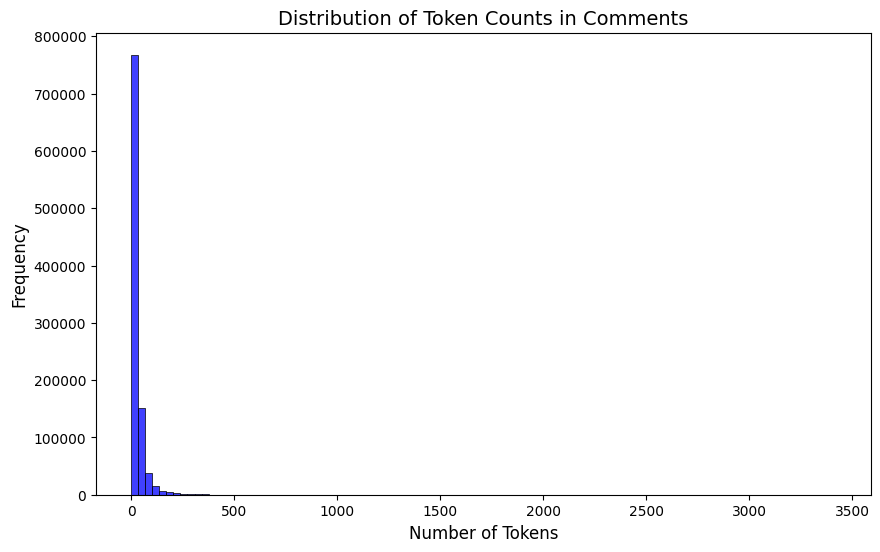

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CountTokens'], kde=False, bins=100, color='blue')

# Adding titles and labels
plt.title('Distribution of Token Counts in Comments', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
com_256 = df[(df['CountTokens'] > 2500) & (df['CountTokens'] <= 3500)]
com_256

,CommentText,Sentiment,CommentLength,Tokens,CountTokens
23160,*The USA/collective Western plot is always the...,Negative,9992,"['▁*', 'The', '▁USA', '/', 'collect', 'ive', '...",2502
64495,"Here's the clear, absolute, precise, mathemati...",Neutral,8118,"['▁Here', ""'"", 's', '▁the', '▁clear', ',', '▁a...",2554
111733,"the modified html code , hope this helps \n{% ...",Neutral,9698,"['▁the', '▁modifi', 'ed', '▁', 'html', '▁code'...",2714
124333,brother ❌ BROTHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,Negative,6525,"['▁brother', '▁', '❌', '▁', 'BRO', 'THA', 'AA'...",3257
196396,Lab Program 1 – Bubble Sort internal class Sor...,Neutral,7254,"['▁Lab', '▁Program', '▁1', '▁–', '▁Bu', 'bble'...",2549
336098,"@RestController\r\n@RequestMapping(value = ""/e...",Neutral,7594,"['▁@', 'R', 'est', 'Control', 'ler', '▁@', 'Re...",2603
365685,"INSERT INTO car (make, model, price) VALUES ('...",Neutral,8749,"['▁INS', 'ERT', '▁', 'INTO', '▁car', '▁(', 'ma...",3389
437546,Lab Program 1 – Bubble Sort\n\ninternal class ...,Neutral,9893,"['▁Lab', '▁Program', '▁1', '▁–', '▁Bu', 'bble'...",2549
441420,"THE CLEAR, ABSOLUTE, PRECISE, MATHEMATICAL, OB...",Neutral,8053,"['▁THE', '▁CL', 'EAR', ',', '▁ABS', 'OLU', 'TE...",2642
583374,Lab Program 1 – Bubble Sort internal class Sor...,Neutral,7253,"['▁Lab', '▁Program', '▁1', '▁–', '▁Bu', 'bble'...",2548


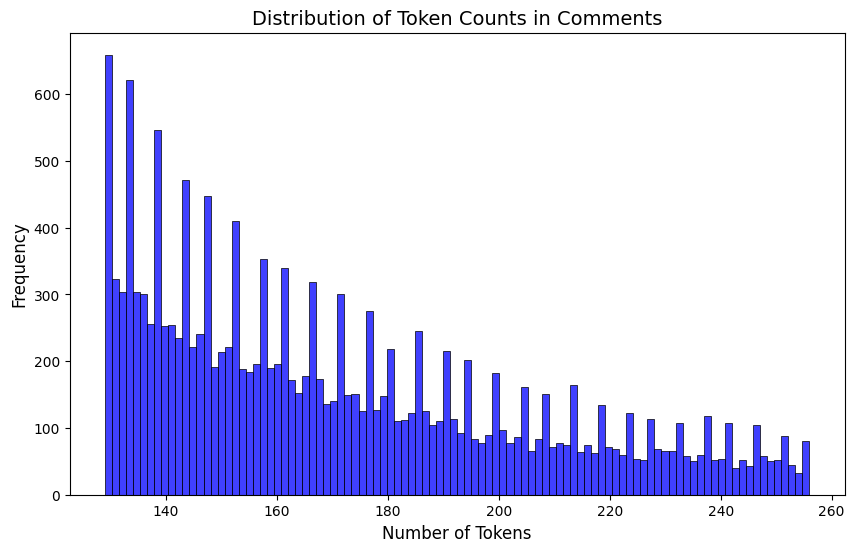

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(com_256['CountTokens'], kde=False, bins=100, color='blue')

# Adding titles and labels
plt.title('Distribution of Token Counts in Comments', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
com256 = com_256.drop(columns=['CommentLength', 'Tokens', 'CountTokens'])
com256

,CommentText,Sentiment
8,Very similar thing happened to me! We lived ne...,Positive
10,This is really valuable information and I appr...,Neutral
164,It doesn't matter whether you have an EV or an...,Neutral
283,Johnny was not being abusive here. He didn’t h...,Positive
309,"Firstly, thank you so much for your consistent...",Negative
...,...,...
989422,"Hi, I don't know if I have chance to get an a...",Negative
989442,Hey! Thanks for this. It's a great tutorial an...,Positive
989451,Hello! I'm working on a project to create a Di...,Neutral
989477,The video uses a jar with a LOWER pipe input a...,Negative


In [ ]:
com256.dtypes

,0
CommentText,object
Sentiment,object


In [ ]:
com256.to_csv('com256.csv', index=False)